In [1]:
from google.colab import files
uploaded = files.upload()


Saving mushroom.csv to mushroom.csv


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('mushroom.csv')

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
data.head()

,Unnamed: 0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0,2,3,0,0,7,1,0,1,0,...,7,7,0,2,1,4,0,3,4,1
1,1,2,3,9,0,0,1,0,0,0,...,7,7,0,2,1,4,1,2,0,0
2,2,0,3,8,0,1,1,0,0,1,...,7,7,0,2,1,4,1,2,2,0
3,3,2,2,8,0,7,1,0,1,1,...,7,7,0,2,1,4,0,3,4,1
4,4,2,3,3,1,6,1,1,0,0,...,7,7,0,2,1,0,1,0,0,0


In [16]:
data.isnull().sum()

,0
Unnamed: 0,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [9]:
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [11]:
# Separate features and target
X = data.drop('poisonous', axis=1)  # Assuming 'class' is the target column
y = data['poisonous']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\n")

Training set shape: (6499, 23)
Testing set shape: (1625, 23)




In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [18]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [19]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [20]:
# Get the best model
best_rf = grid_search.best_estimator_

In [21]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [22]:
# Print the best parameters and score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 1.00


In [23]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
# Print the accuracy score
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 1.00


In [25]:
# Get feature importances
importances = best_rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

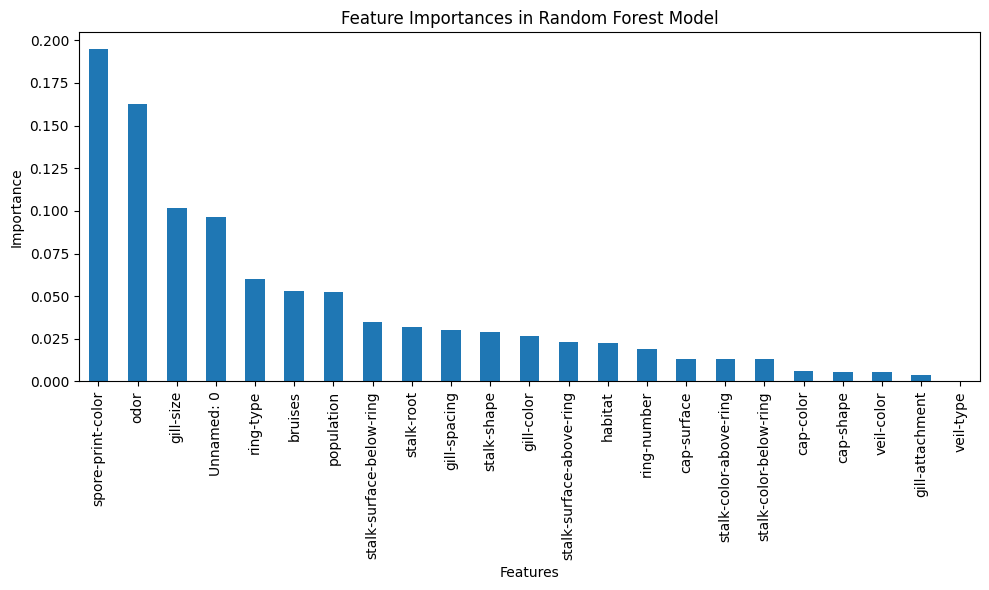

In [28]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()